# Курс "Компьютерное зрение"
# Контекстно-зависимое масштабирование изображений

## Визуализация решения 

В этом ноутбуке вы можете проверить свои функции решения на тестовых изображениях. Шаги визуализации, как и тесты, разбиты на части, чтобы во время решения вы могли видеть результат работы вашего алгоритма на каждом шаге.

Импорты и вспомогательные данные:

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
PREF = "tests/06_unittest_real_shrink_masked_input/public_data/"
PATHS_TO_IMAGES = []
for i in range(1, 8):
    PATHS_TO_IMAGES.append(PREF + "0" + str(i) + "_test_img_input/img.png")
PATHS_TO_MASKS = []
for i in range(1, 8):
    PATHS_TO_MASKS.append(PREF + "0" + str(i) + "_test_img_input/mask.png")


def convert_img_to_mask(img):
    return ((img[:, :, 0] != 0) * -1 + (img[:, :, 1] != 0)).astype('int8')


def get_seam_coords(seam_mask):
        coords = np.where(seam_mask)
        t = [i for i in zip(coords[0], coords[1])]
        t.sort(key=lambda i: i[0])
        return tuple(t)

### Энергия изображения

Для начала визулизируем подсчет энергии. Так как это модуль градиента, на изображении должны быть выделены границы объектов.

In [3]:
from seam_carve import compute_energy

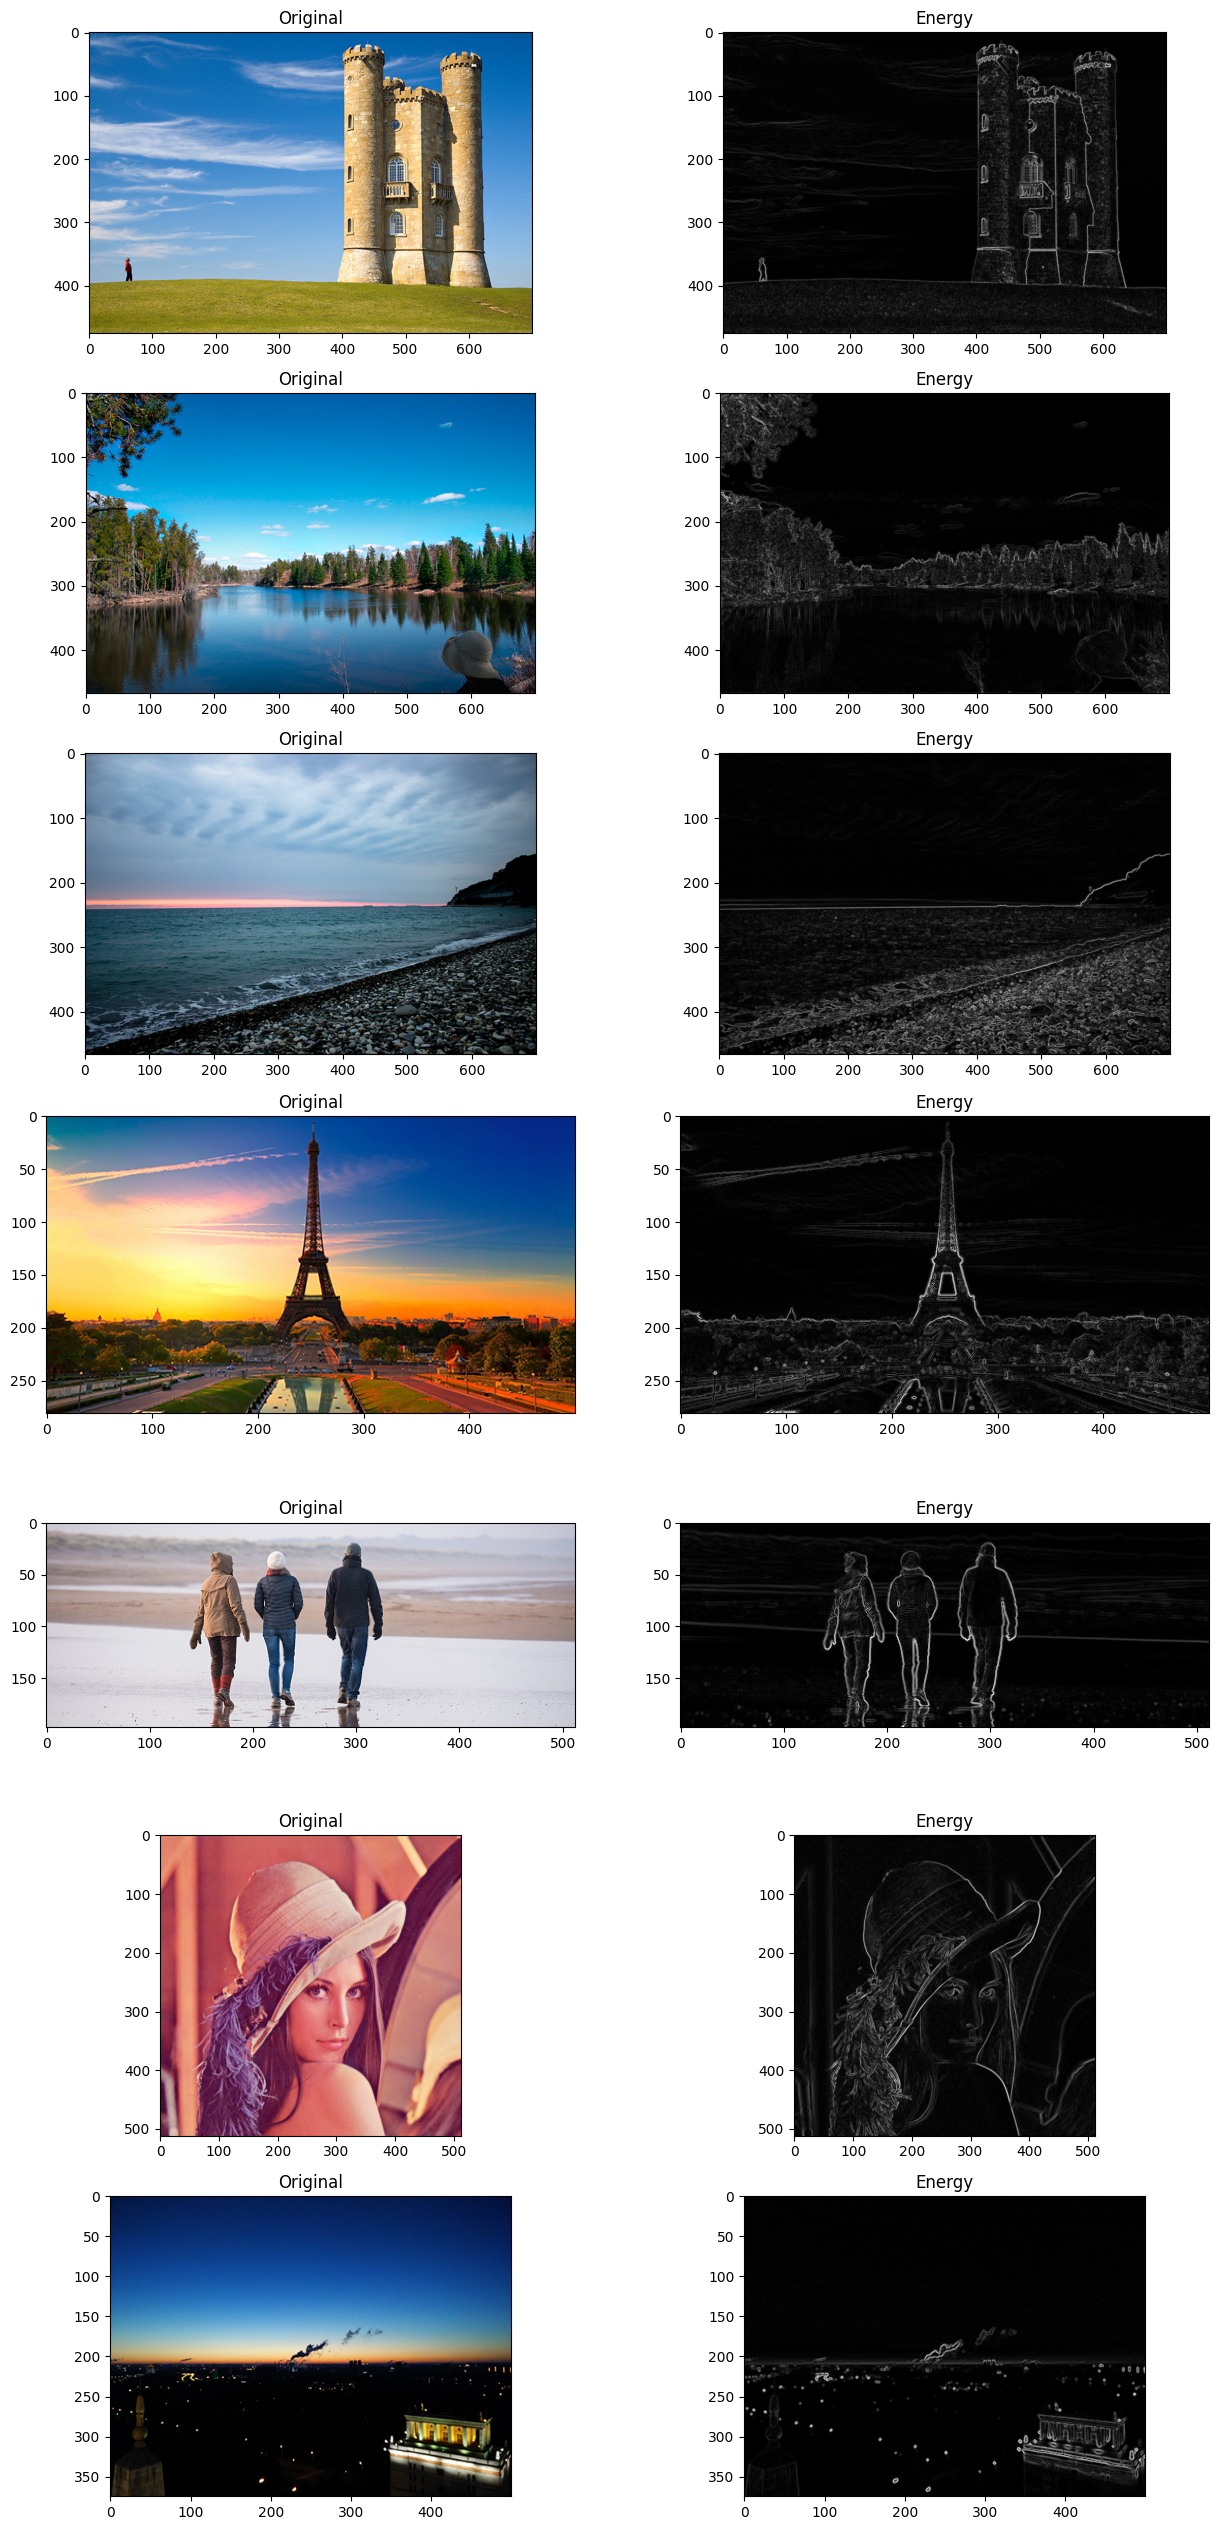

In [4]:
f, ax = plt.subplots(len(PATHS_TO_IMAGES), 2, figsize=(15, 32))
for i in range(len(PATHS_TO_IMAGES)):
    img = plt.imread(PATHS_TO_IMAGES[i])
    ax[i][0].imshow(img)
    ax[i][0].set_title("Original")
    ax[i][1].imshow(compute_energy(img), cmap="gray")
    ax[i][1].set_title("Energy")

### Подсчет матриц для поиска минимального шва

Здесь можно визуализировать выход функции $compute\_seam\_matrix$:

In [5]:
from seam_carve import compute_seam_matrix

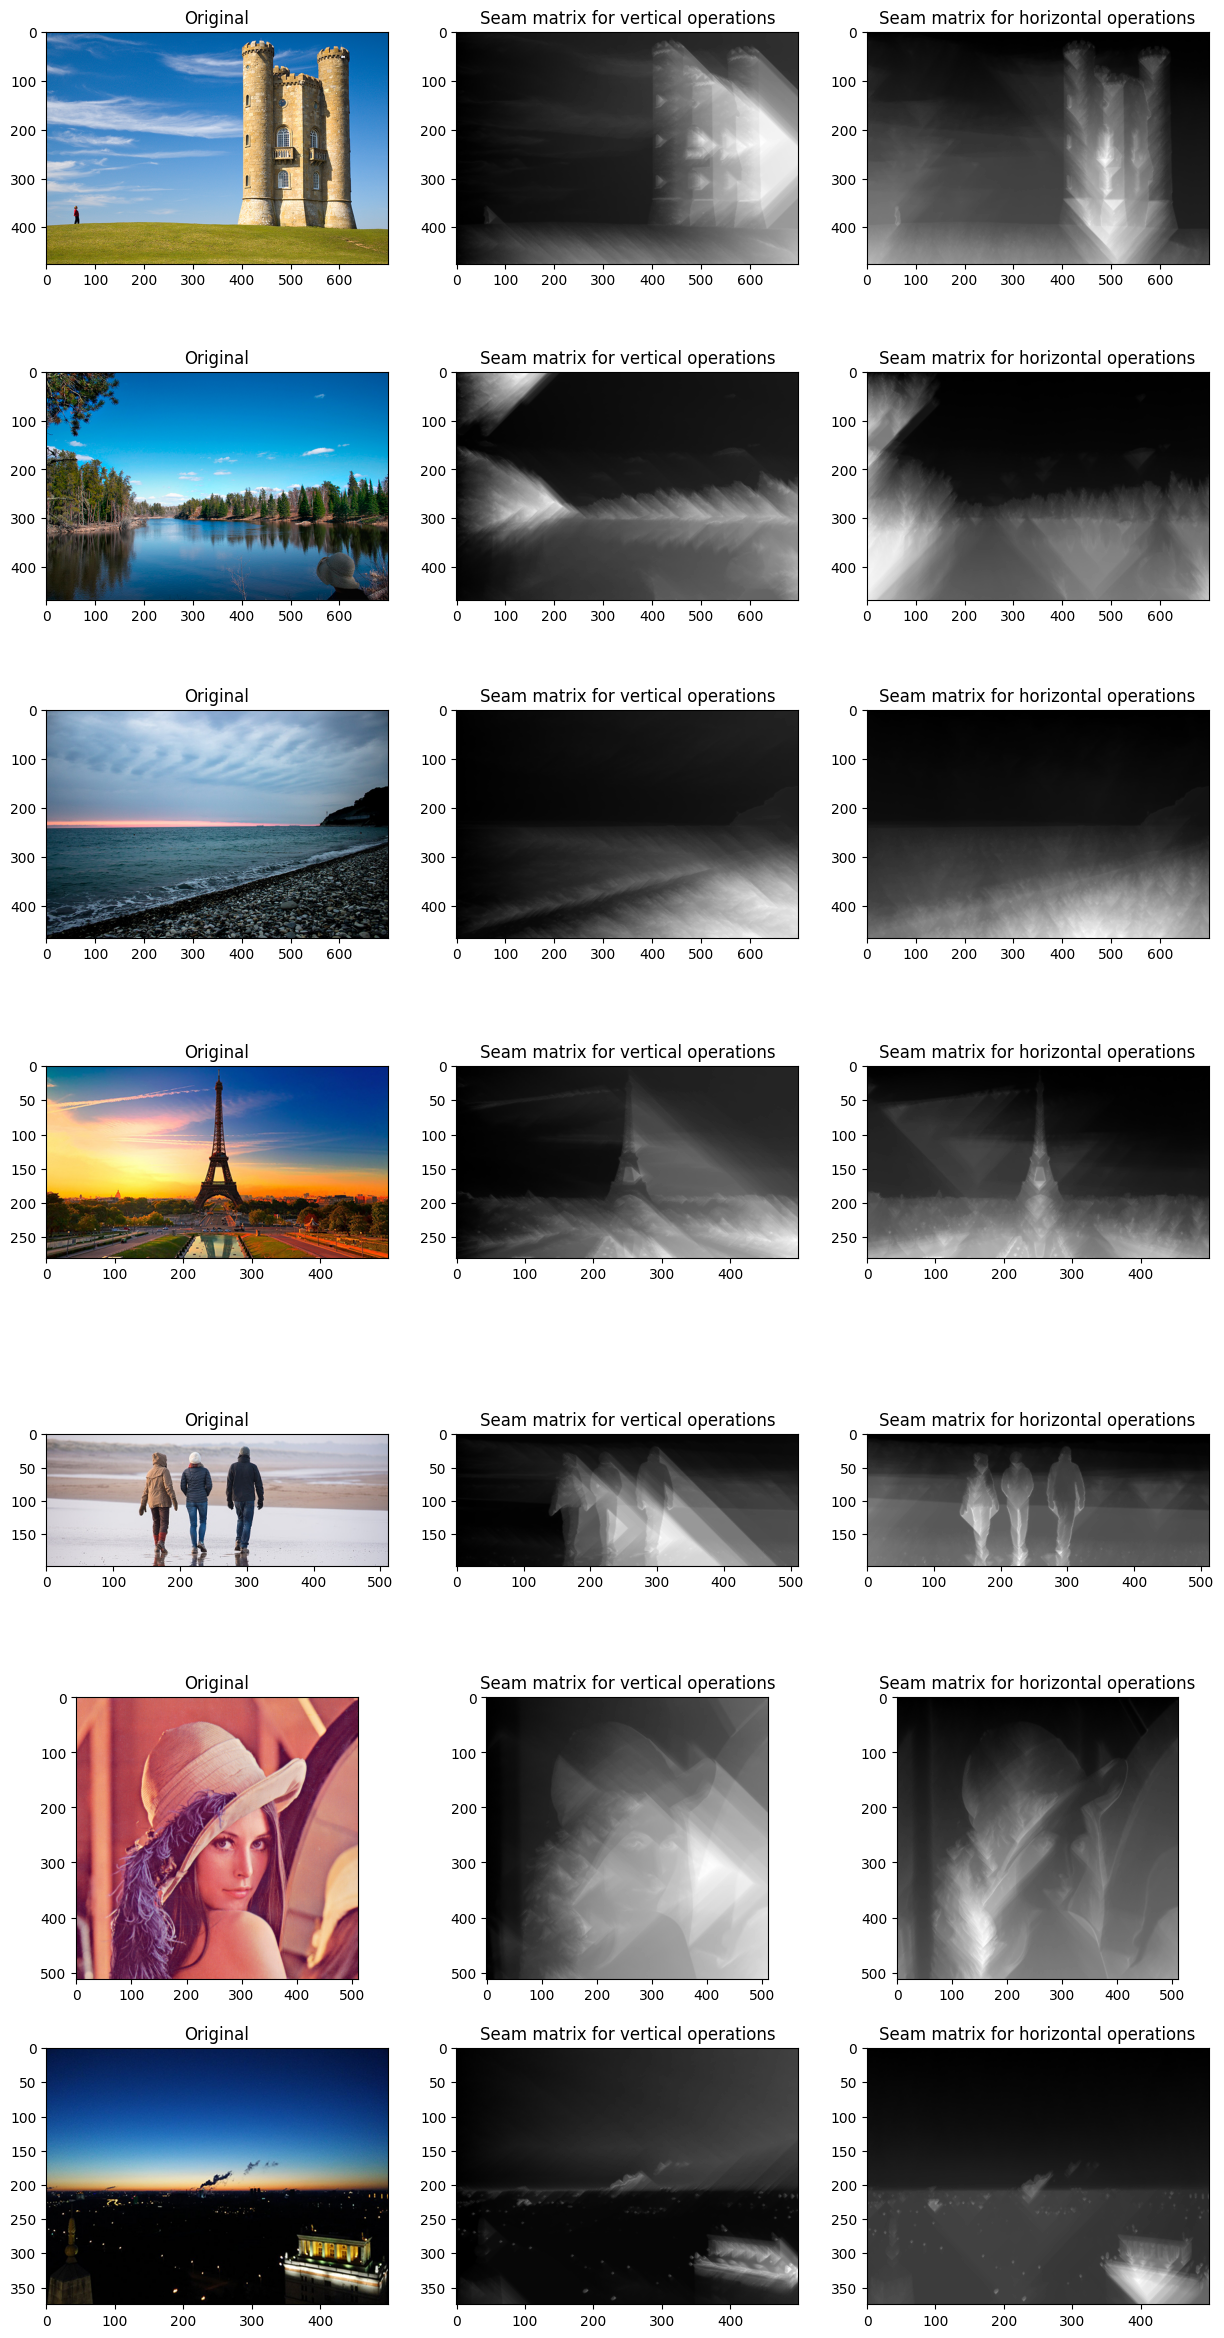

In [6]:
f, ax = plt.subplots(len(PATHS_TO_IMAGES), 3, figsize=(15, 30))
for i in range(len(PATHS_TO_IMAGES)):
    img = plt.imread(PATHS_TO_IMAGES[i])
    ax[i][0].imshow(img)
    ax[i][0].set_title("Original")
    ax[i][1].imshow(compute_seam_matrix(compute_energy(img), "vertical"), cmap="gray")
    ax[i][1].set_title("Seam matrix for vertical operations")
    ax[i][2].imshow(compute_seam_matrix(compute_energy(img), "horizontal"), cmap="gray")
    ax[i][2].set_title("Seam matrix for horizontal operations")

### Работа с маской

Здесь видно, как наличие маски влияет на матрицу швов:

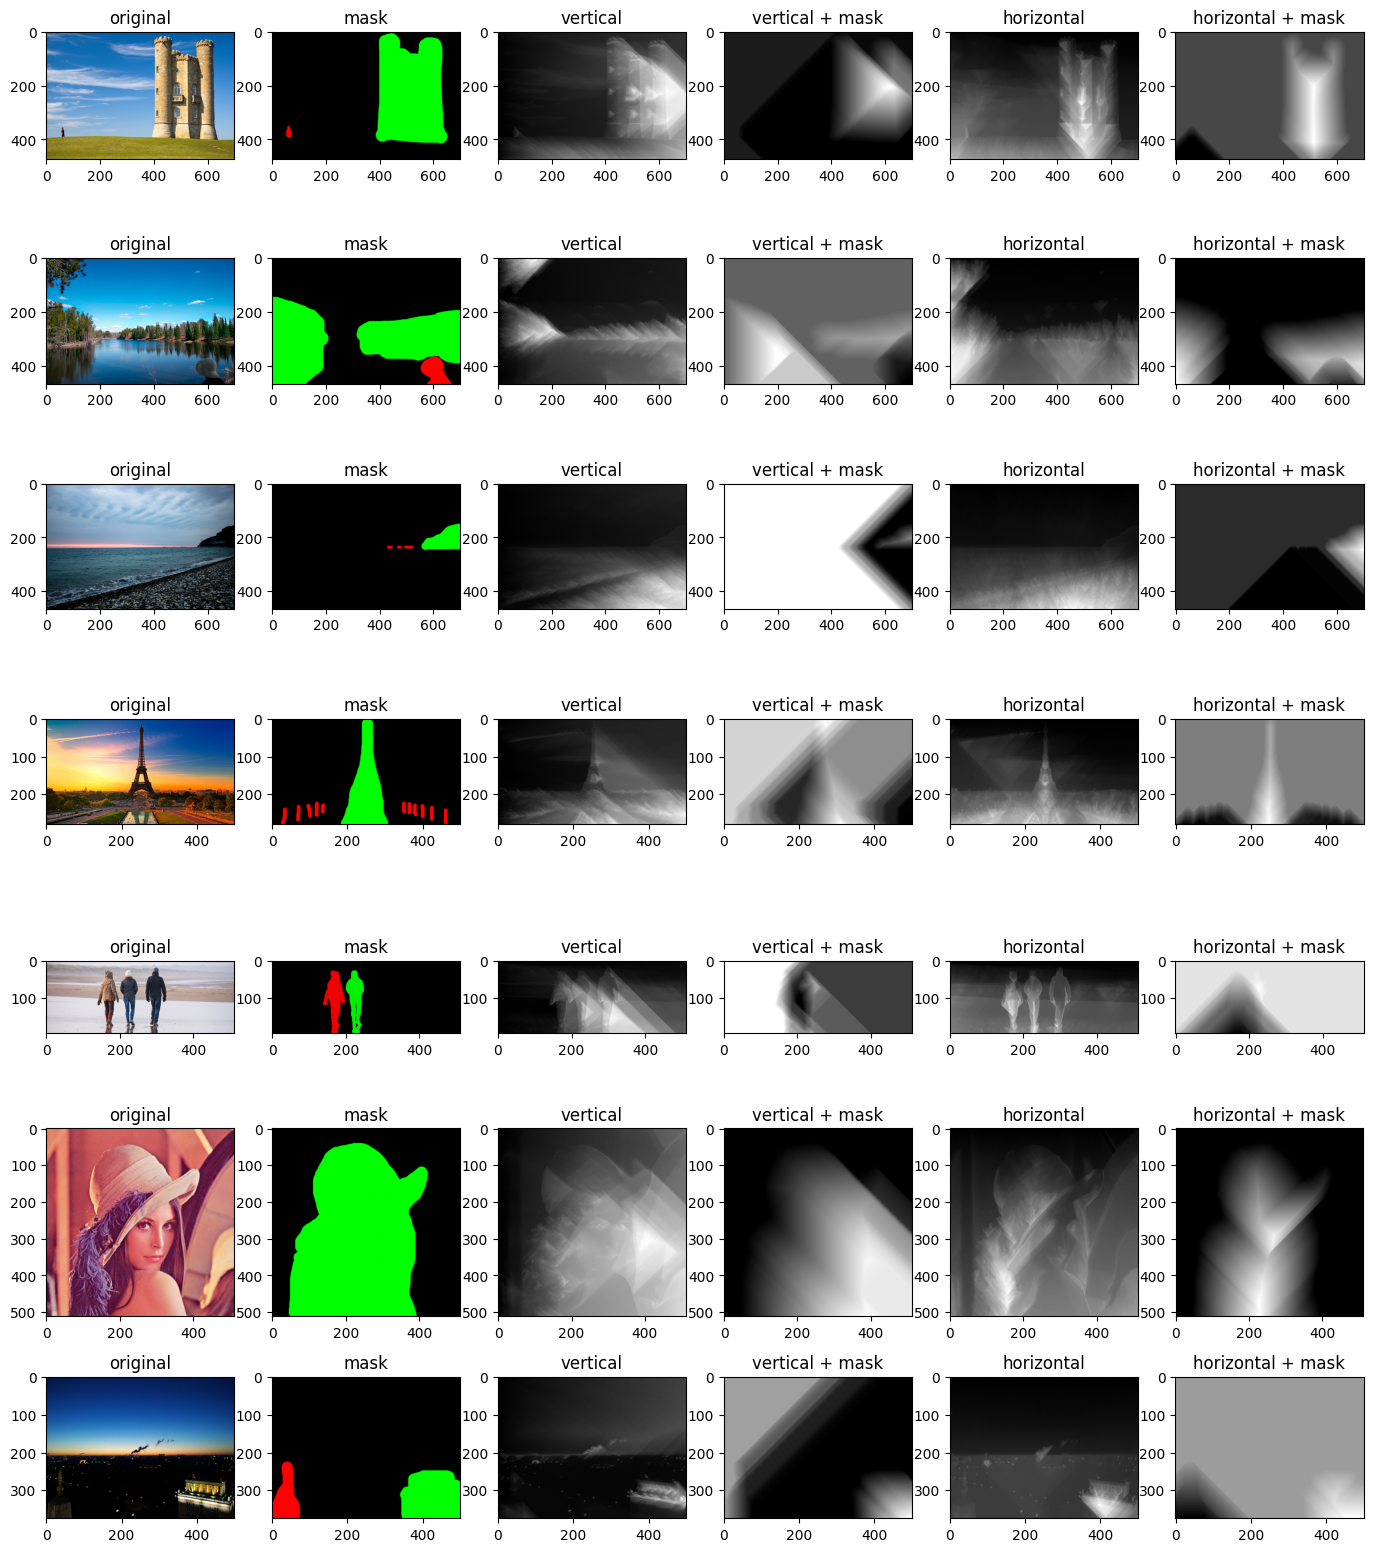

In [7]:
f, ax = plt.subplots(len(PATHS_TO_IMAGES), 6, figsize=(17, 20))
for i in range(len(PATHS_TO_IMAGES)):
    img = plt.imread(PATHS_TO_IMAGES[i])
    mask = plt.imread(PATHS_TO_MASKS[i])
    ax[i][0].imshow(img)
    ax[i][0].set_title("original")
    ax[i][1].imshow(mask, cmap="gray")
    ax[i][1].set_title("mask")
    mask = convert_img_to_mask(mask)
    ax[i][2].imshow(compute_seam_matrix(compute_energy(img), "vertical"), cmap="gray")
    ax[i][2].set_title("vertical")
    ax[i][3].imshow(compute_seam_matrix(compute_energy(img), "vertical", mask=mask), cmap="gray")
    ax[i][3].set_title("vertical + mask")
    ax[i][4].imshow(compute_seam_matrix(compute_energy(img), "horizontal"), cmap="gray")
    ax[i][4].set_title("horizontal")
    ax[i][5].imshow(compute_seam_matrix(compute_energy(img), "horizontal", mask=mask), cmap="gray")
    ax[i][5].set_title("horizontal + mask")

### Удаление шва из изображения

И завершающий шаг — удаление минимального шва из изображения. 
Здесь будем использовать уже финальную функцию $seam\_carve$ и визуализируем полученный шов на оргинальном изображении, используя маску шва, которую возвращает функция.

Швы на изображениях выделены белым или черным цветом в зависимости от фона.

In [8]:
from seam_carve import seam_carve

Сначала вертикальные операции

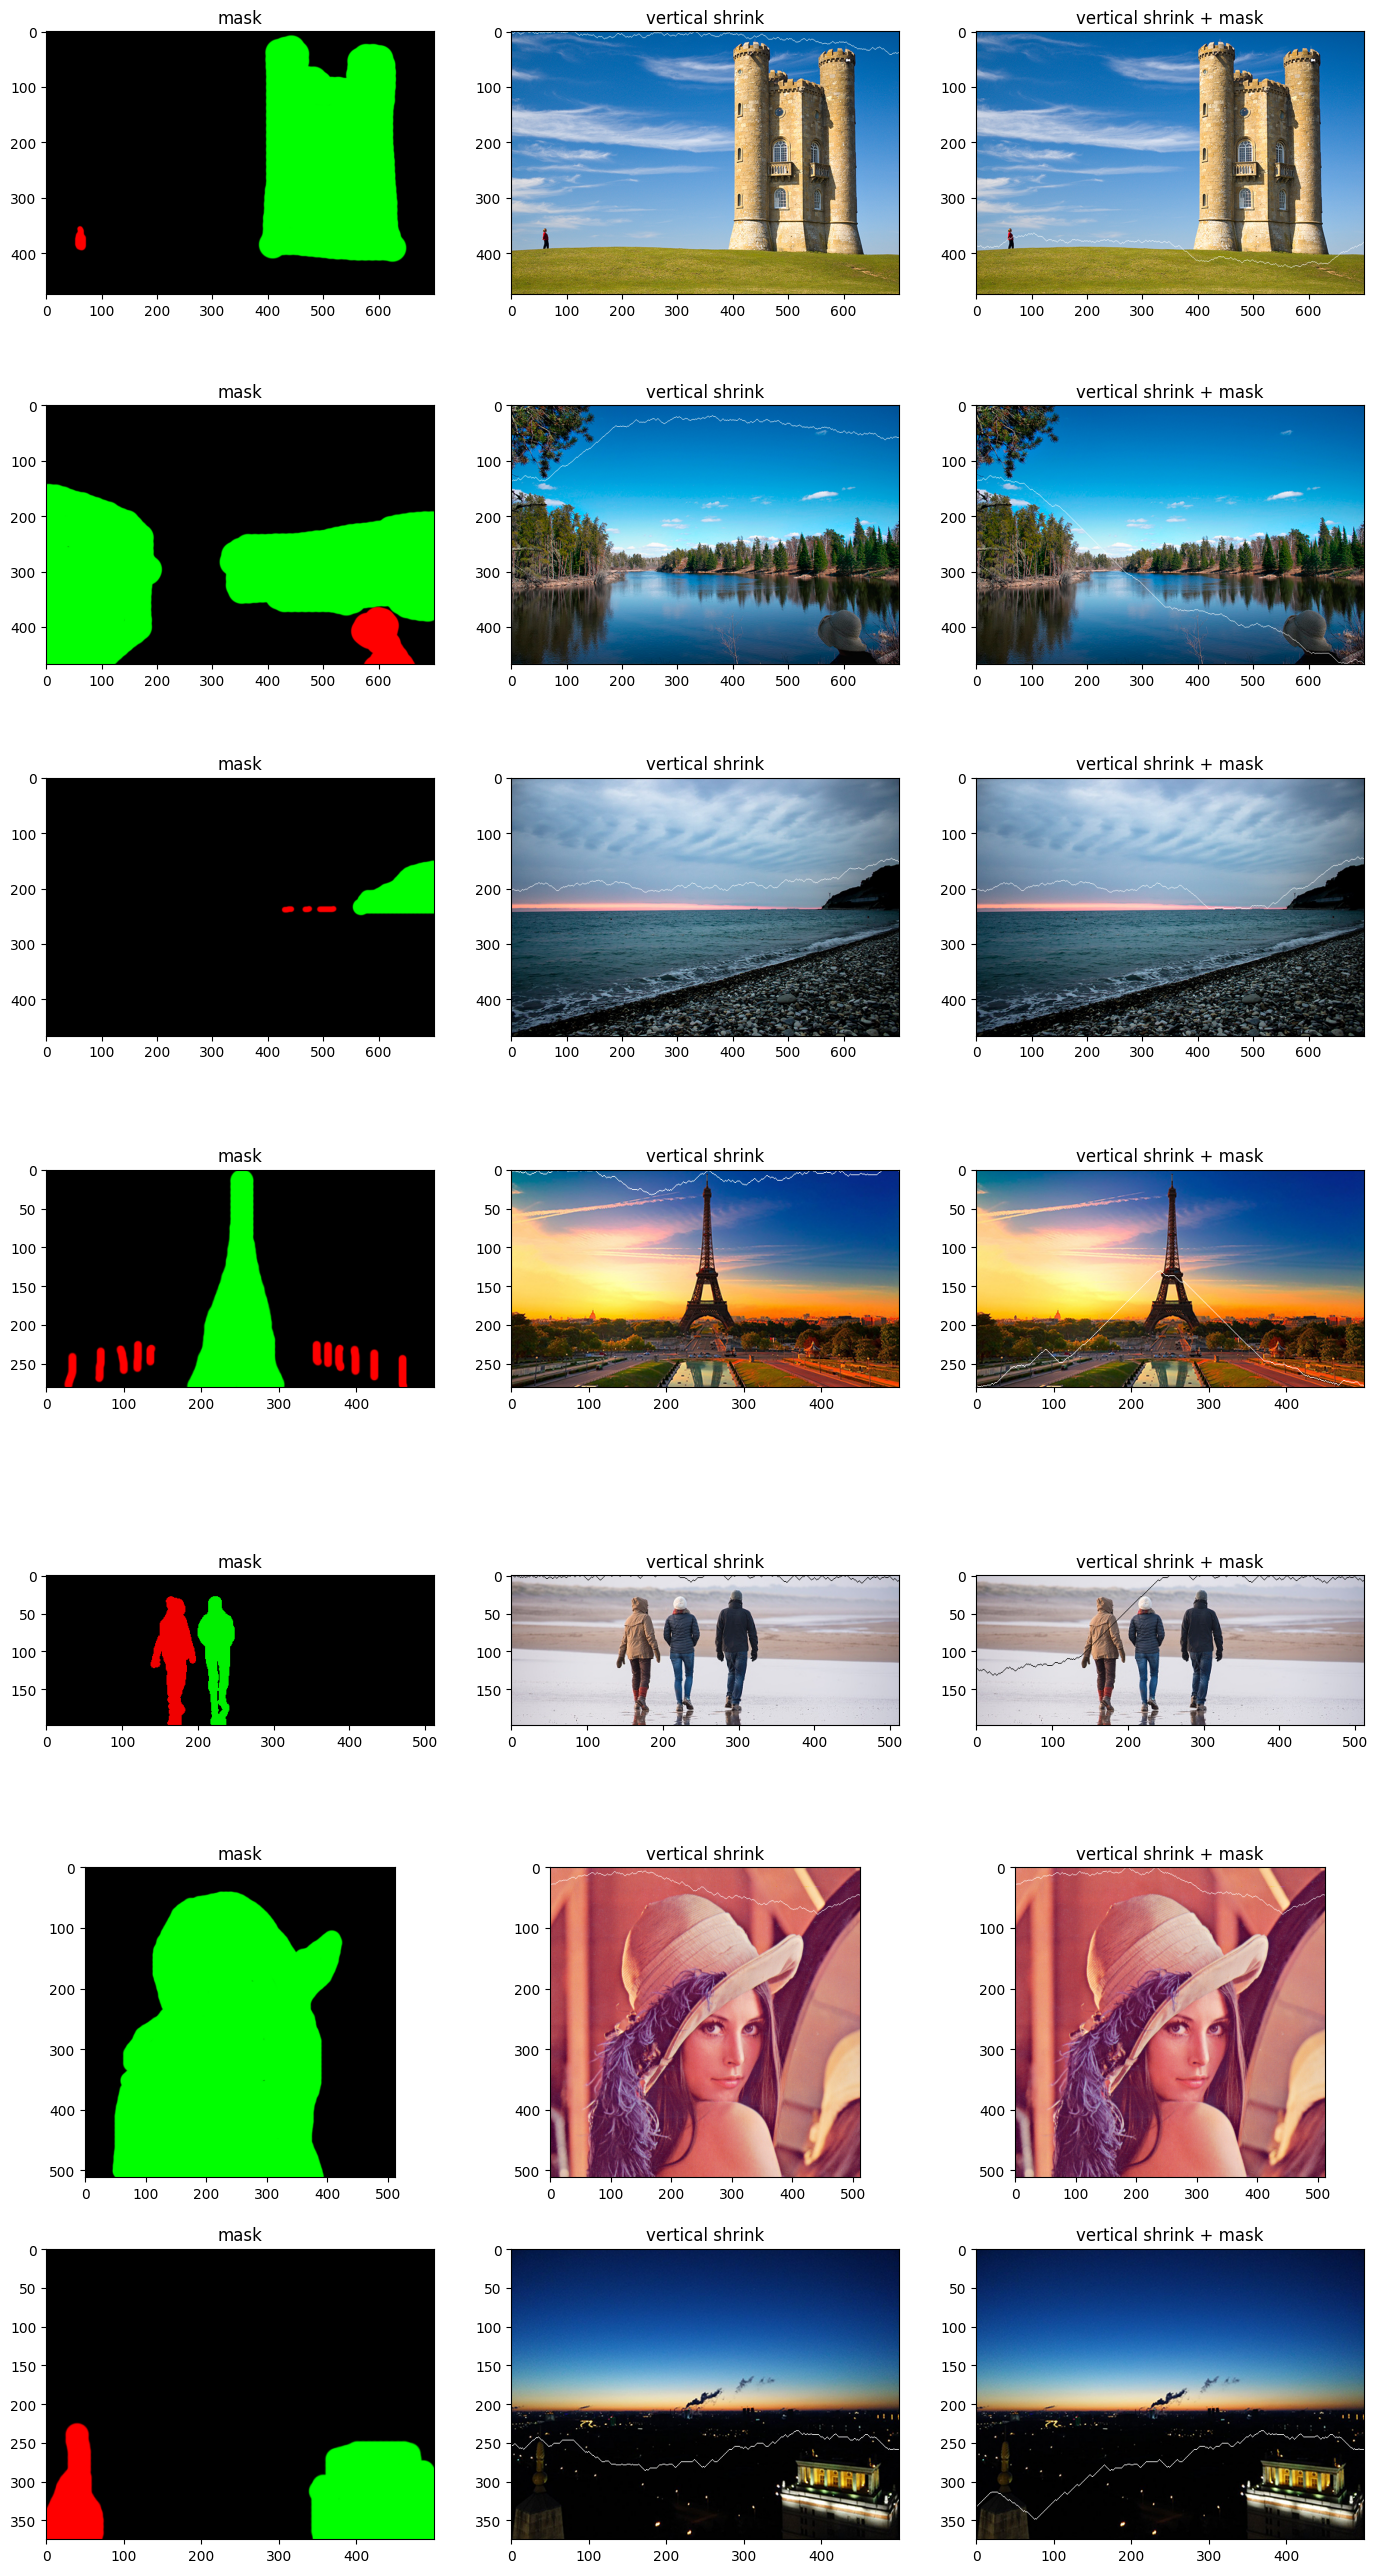

In [9]:
f, ax = plt.subplots(len(PATHS_TO_IMAGES), 3, figsize=(17, 33))
for i in range(len(PATHS_TO_IMAGES)):
    img = plt.imread(PATHS_TO_IMAGES[i])
    mask = plt.imread(PATHS_TO_MASKS[i])
    ax[i][0].imshow(mask, cmap="gray")
    ax[i][0].set_title("mask")
    mask = convert_img_to_mask(mask)
    
    for j, (mode, mask, name) in enumerate([("vertical shrink", None, "vertical shrink"),
                                            ("vertical shrink", mask, "vertical shrink + mask")]):
        visual = img.copy()
        _, _, seam_mask = seam_carve(img, mode, mask)
        visual[np.where(seam_mask == 1)] = 1
        if i == 4:
            visual[np.where(seam_mask == 1)] = 0
        ax[i][1 + j].imshow(visual)
        ax[i][1 + j].set_title(name)

Теперь горизонтальные:

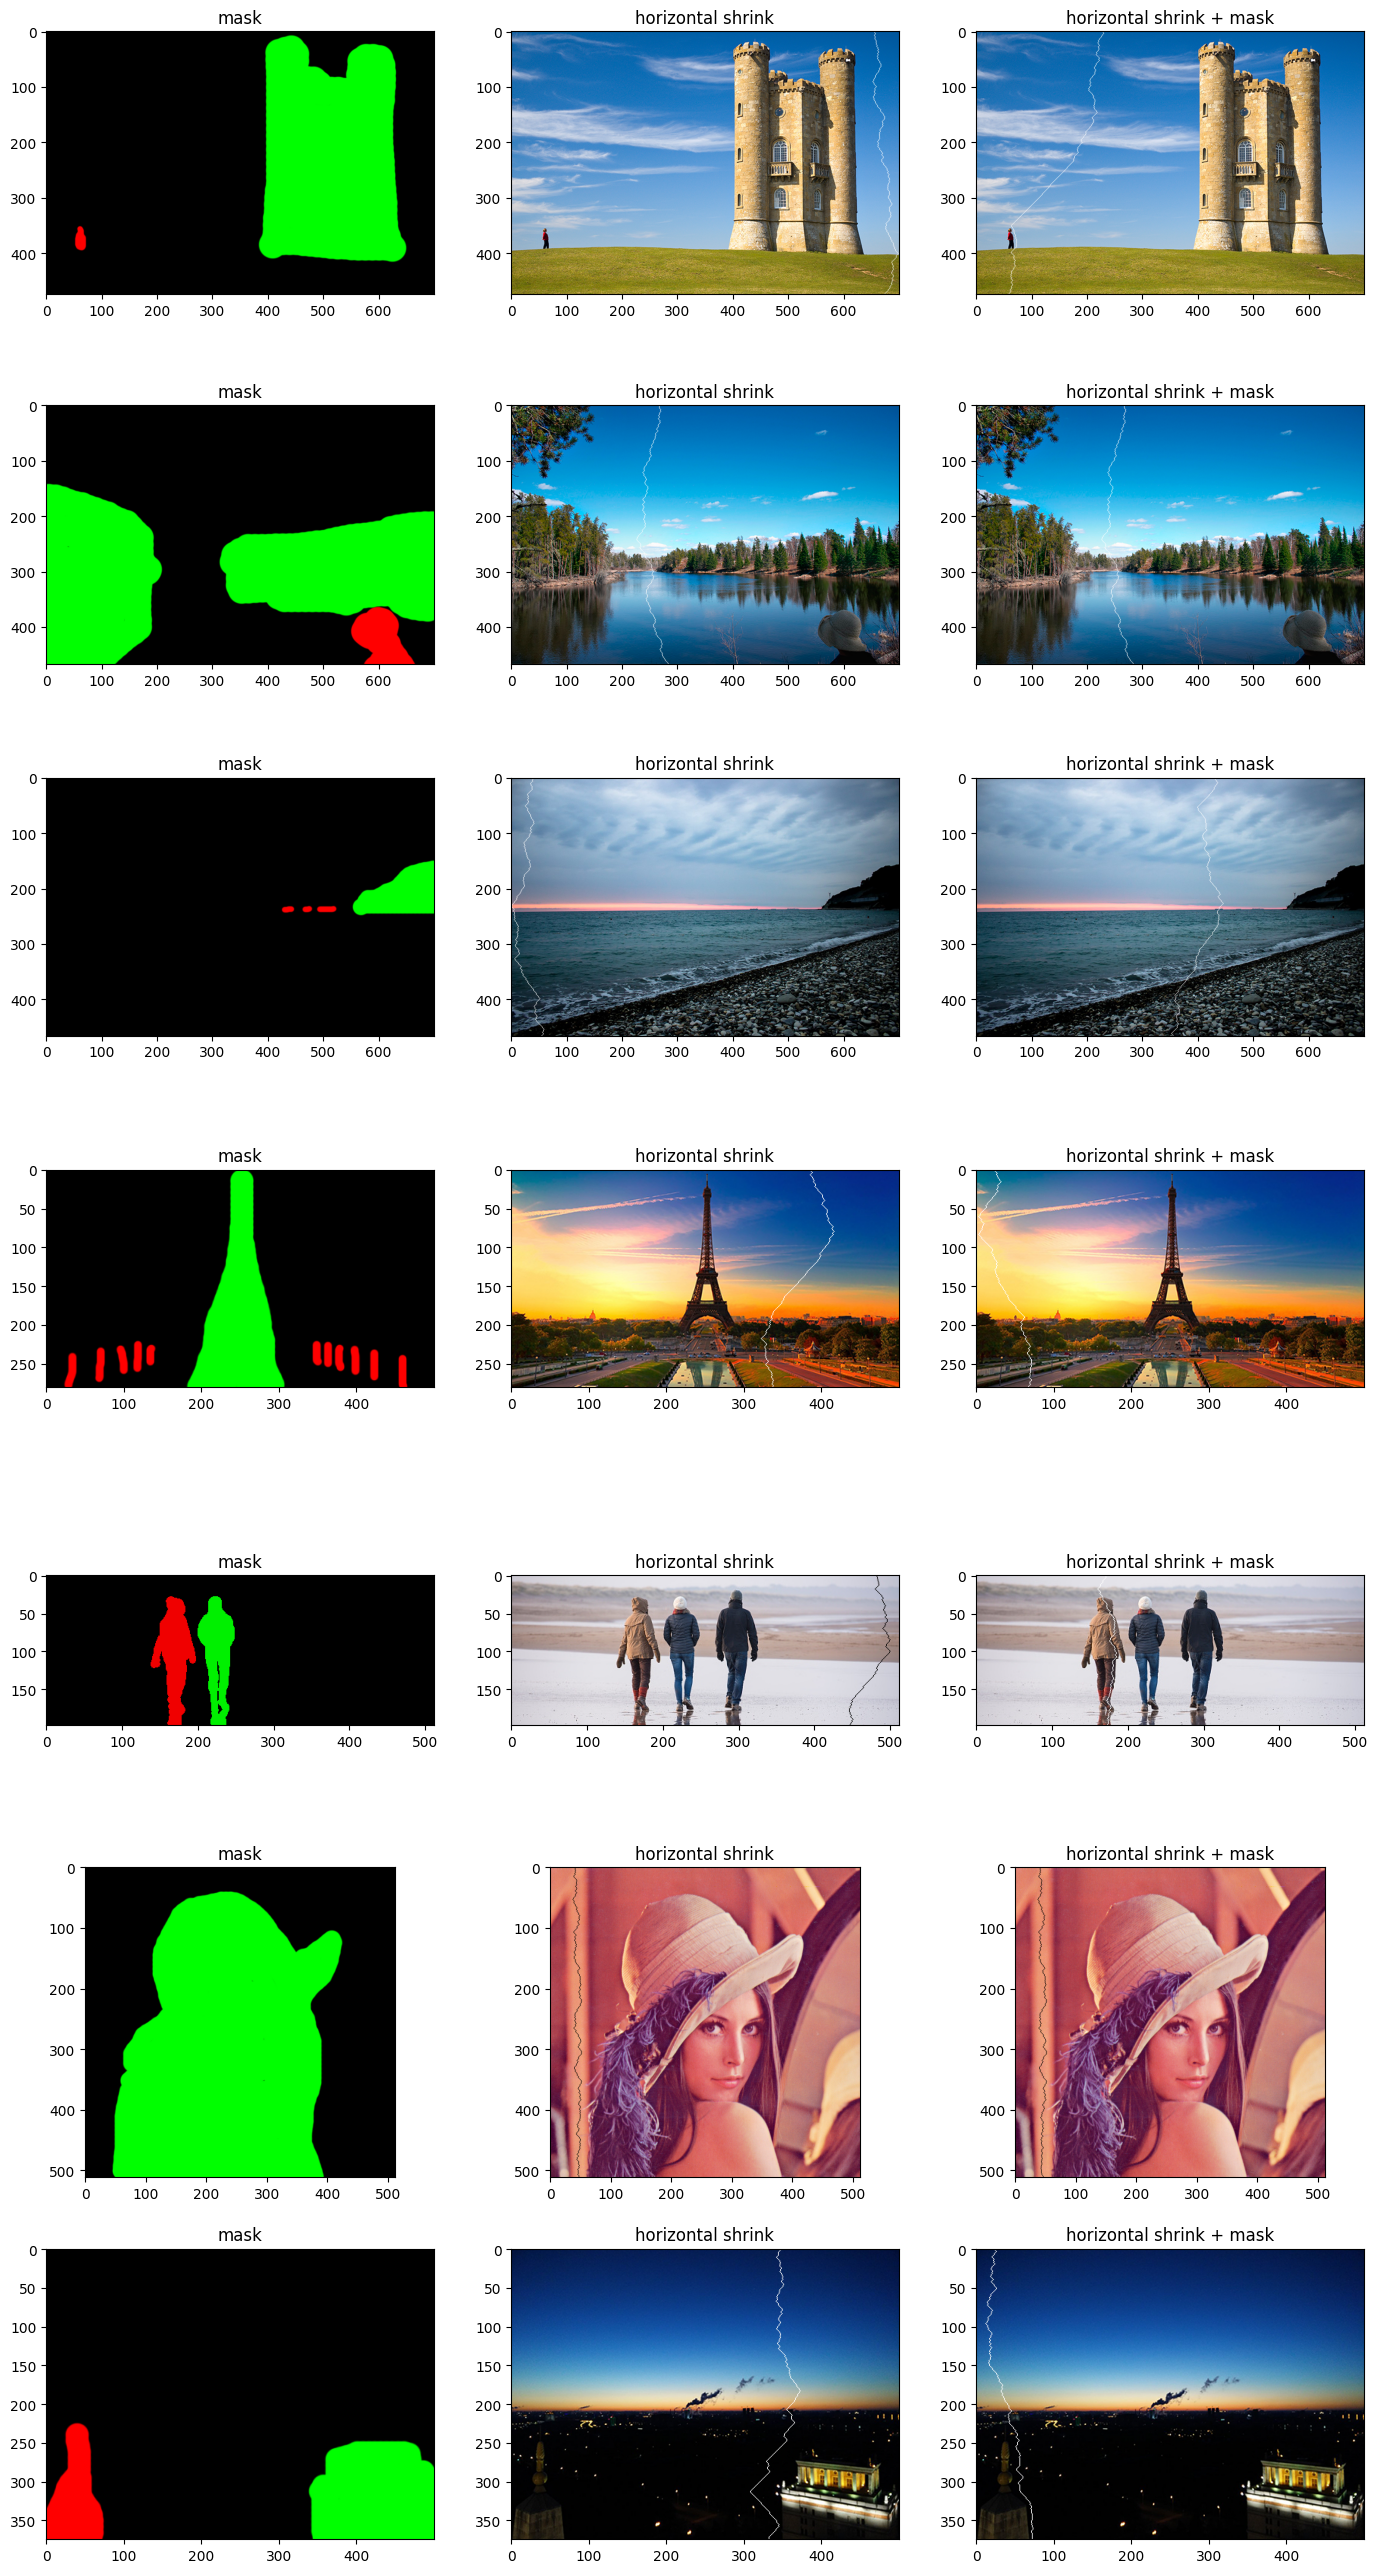

In [10]:
f, ax = plt.subplots(len(PATHS_TO_IMAGES), 3, figsize=(17, 33))
for i in range(len(PATHS_TO_IMAGES)):
    img = plt.imread(PATHS_TO_IMAGES[i])
    mask = plt.imread(PATHS_TO_MASKS[i])
    ax[i][0].imshow(mask, cmap="gray")
    ax[i][0].set_title("mask")
    mask = convert_img_to_mask(mask)
    
    for j, (mode, mask, name) in enumerate([("horizontal shrink", None, "horizontal shrink"),
                                            ("horizontal shrink", mask, "horizontal shrink + mask")]):

        visual = img.copy()
        _, _, seam_mask = seam_carve(img, mode, mask)
        visual[np.where(seam_mask == 1)] = 1
        if (i == 4 and mask is None) or i == 5:
            visual[np.where(seam_mask == 1)] = 0
        ax[i][1 + j].imshow(visual)
        ax[i][1 + j].set_title(name)